In [7]:
import numpy as np
import pylab as plt
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split

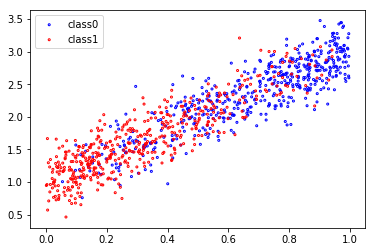

514

In [95]:
def f(x):
    return 2*x + 1

x=np.random.uniform(0,1,1000)


x0 = []
y0 = []

x1 = []
y1 = []

Y1=np.zeros(len(x))

X1=np.zeros((len(x),2))


for i in range(len(x)):

    
    if np.random.random() < x[i]:
        x0.append(x[i])
        y0.append( f(x[i]) + np.random.normal(0,0.25)  )

        
    else:
        x1.append(x[i])
        y1.append( f(x[i]) + np.random.normal(0,0.25) ) 



plt.scatter(x0,y0,s=4,facecolors='none',edgecolors='b',label='class0') # class 0
plt.scatter(x1,y1,s=4,facecolors='none',edgecolors='r', label='class1') # class 1
plt.legend()
plt.show()
len(x0)

In [96]:


Y1=np.zeros(len(x0))
Y2=np.ones(len(x1))
Y=np.concatenate((Y1, Y2), axis=0)

x=np.concatenate((x0, x1), axis=0)
y=np.concatenate((y0, y1), axis=0)

X=np.stack((x, y), axis=-1)

X = np.asarray(X)
Y = np.asarray(Y)

X = scale(X)
X = X.astype(float)
Y = Y.astype(float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)

X.shape , Y.shape

((1000, 2), (1000,))

In [97]:
import theano
import pymc3 as pm
import sklearn
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split

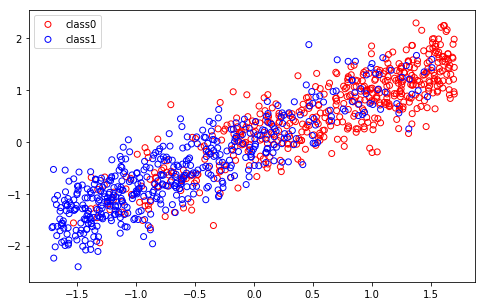

In [111]:

plt.figure(figsize=(8,5))
plt.scatter(X[Y==0, 0], X[Y==0, 1], facecolors='none',edgecolors='r',label='class0')
plt.scatter(X[Y==1, 0], X[Y==1, 1], facecolors='none',edgecolors='b',label='class1')
plt.legend()
plt.show()



In [99]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

In [100]:
# create model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [101]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
model.fit(X_train, Y_train, epochs=15, batch_size=10)

Epoch 1/15
750/750 [==============================] - 0s 599us/step - loss: 0.6868 - acc: 0.5853
Epoch 2/15
750/750 [==============================] - 0s 156us/step - loss: 0.6686 - acc: 0.6747
Epoch 3/15
750/750 [==============================] - 0s 136us/step - loss: 0.6432 - acc: 0.7387
Epoch 4/15
750/750 [==============================] - 0s 162us/step - loss: 0.6124 - acc: 0.7600
Epoch 5/15
750/750 [==============================] - 0s 229us/step - loss: 0.5823 - acc: 0.7667
Epoch 6/15
750/750 [==============================] - 0s 149us/step - loss: 0.5564 - acc: 0.7720
Epoch 7/15
750/750 [==============================] - 0s 134us/step - loss: 0.5362 - acc: 0.7760
Epoch 8/15
750/750 [==============================] - 0s 156us/step - loss: 0.5222 - acc: 0.7760
Epoch 9/15
750/750 [==============================] - 0s 124us/step - loss: 0.5125 - acc: 0.7787
Epoch 10/15
750/750 [==============================] - 0s 165us/step - loss: 0.5064 - acc: 0.7773
Epoch 11/15
750/750 [========

In [103]:
# evaluate the model
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

750/750 [==============================] - 0s 228us/step

acc: 77.87%


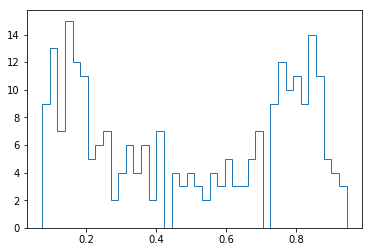

In [108]:
predictions = model.predict(X_test)
plt.hist(predictions,bins=40,histtype='step')
plt.show()

rounded = [round(x[0]) for x in predictions]


In [109]:
c=0
for i in range(len(Y_test)):
    if rounded[i]==Y_test[i]:
        c+=1
accuracy = c/i
print(accuracy)

0.7590361445783133
